<a href="https://colab.research.google.com/github/lab30041954/ML_IESE_Course/blob/main/%5BML-05%5D%20Ensemble%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ML-05] Ensemble models

## Ensemble models

Suppose that you ask a complex question to thousands of random people, and then aggregate their answers. In many cases, you will find that this aggregate answer is better than an expert's answer. This has been called the **wisdom of the crowds**.

**Ensemble learning** is based on a similar idea. If you aggregate the predictions of a group of regression or classification models, you will often get better predictions than with the best individual model. Let us be more specific: 

* Suppose that you have trained a few regression models, each one achieving a moderate R-squared statistic. A simple way to get better predictions could be to average the predictions of these models.

* In a classification context, you would average the predicted class probabilities. This is called **soft voting**. Alternatively, you can use **hard-voting**, which consists in picking the class with more votes. This course only covers soft voting.

The collection of models whose predictions are aggregated is called an **ensemble**. In scikit-learn, the subpackage `ensemble` offers plenty of choice. On top of the popularity ranking, we find random forest and gradient boosting models, both using ensembles of decision tree models.

## Random forests

One way to get a diverse ensemble is to use the same algorithm for every predictor, but training it on different random subsets of the training set. When these subsets are extracted by means of **sampling with replacement**, the method is called **bagging** (short for bootstrap aggregating). Bagging allows training instances to be sampled several times for the same predictor.

The star of the bagging ensemble methods is the **random forest** algorithm, which allows extra randomness when growing trees, by using just a random subset of the features at every split. This results in a greater tree diversity, generally yielding an overall better model. Despite its simplicity, random forest models are among the most powerful predictive models available. In general, they are trained faster and have less overfitting problems than other models.

Random forests can be used for both regression and classification. In the scikit-learn subpackage `ensemble`, this is provided by the estimator classes `RandomForestRegressor()` and `RandomForestClassifier()`. The example of this lecture shows a specific application of a regression random forest model.

The growth of the trees in a random forest is controlled with parameters such as `max_depth` and `max_leaf_nodes` (no defaults), as in individual tree models. You can also control the number of trees with the parameter `n_estimators` (the default is 100 trees), and the number of features that can be used at every split with the parameter `max_features` (look at the scikit-learn API Reference or use an AI assistant if you wish to play with this argument). 

In general, increasing the tree size or the number of trees leads to better prediction, but this may come at the price of overfitting the training data. A (usually) safe approach is to accept the default `n_estimators=100`, increasing gradually the tree size and testing overfitting at every step.

## Gradient boosting

The general idea of the **boosting** methodology is to train the models of the ensemble sequentially, each model trying to correct the errors of its predecessor. The star is here the **gradient boosting** algorithm, used in both regression and classification. As in the random forest algorithm, the models of the ensemble are based on decision trees, though, now, every tree model is trained on the errors made by the previous one.

The prediction of the ensemble model is obtained as a weighted average. The weights decrease at every step according to a parameter called **learning rate**. With a low learning rate, the weights decrease more slowly. There is a trade-off between the learning rate and the number of trees. With a low learning rate, you will probably need a higher number of trees. Some experts recommend to set a low learning rate (in the range from 0.001 to 0.01) and aim at a high number of trees (in the range from 3,000 to 10,000), but for that you may need huge computing power, since gradient boosting gets slower as the number of features gets high.

In scikit-learn, gradient boosting is provided by the classes `GradientBoostingRegressor()` and `GradientBoostingClassifier()`, from the subpackage `ensemble`. The growth of the trees and the number of trees is controlled as for random forest models. 
**XGBoost** (extreme gradient boosting) is an implementation of gradient boosting designed for speed and performance. Gradient boosting optimization takes less time in `xgboost` than in scikit-learn. The defaults are `n_estimators=100`, `learning_rate=0.3` and `max_depth=6`.

For many years, XGBoost models have often been top-ranked in applied machine learning competitions. For Python, the comes in the package `xgboost`, which can be used as if it were a scikit-learn subpackage. It can be installed from the shell or the console, with 

```
! pip install xgboost
```

## Example - House sales in King County

### Introduction

This example illustrates the use of ensemble models in a regression context. We develop various models, starting with a linear regression equation, for predicting **house sale prices** in King County (Washington), which includes Seattle. King is the most populous county in Washington (population 1,931,249 in the 2010 census), and the 13th-most populous in the United States. The data include the homes sold between May 2014 and May 2015 (both included).

### The data set

The data come in the file `king.csv`. It contains 13 house features plus the sale price and date, along with 21,613 observations.

The variables are:

* `id`, an identifier of the house.

* `date`, a string representing the date when the sale took place. Example: November 13th, 2014 comes as '20141013T000000'.

* `zipcode`, the ZIP code of the house, with 70 different values.

* `lat`, the latitude of the house.

* `long`, the longitude of the house.

* `bedrooms`, the number of bedrooms.

* `bathrooms`, the number of bathrooms.

* `sqft_above`, the square footage of the house, discounting the basement.

* `sqft_basement`, the square footage of the basement.

* `sqft_lot`, the square footage of the lot.

* `floors`, the total floors (levels) in the house.

* `waterfront`, a dummy for having a view to the waterfront.

* `condition`, a 1-5 rating.

* `yr_built`, the year when the house was built.

* `yr_renovated`, the year when the house was renovated.

* `price`, the sale price, in  US dollars.

Source: Kaggle.


### Questions

Q1. How is the distribution of the sale price?

Q2. Develop a linear regression model for predicting the sale price in terms of the house features, leaving aside the zipcode.

Q3. Plot the actual price versus the price predicted by the model. What do you see?

Q4. Add a dummy for every zipcode to the feature collection and run the analysis again. Is this better?

Q5. Train a **decision tree model**, a **random forest model** and a **gradient boosting model**. What is the difference?

Q6. Validate the two most promising models, among those trained, using a **train-test split**.

### Importing the data

We import the data as in the previous lectures. We take here the column `id` as the index (`index_col=0`).

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'king.csv', index_col=0)

### Exploring the data

We print a report of the content of `df` with the method `.info()`. Everything comes as expected, so far. There are no missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   zipcode        21613 non-null  int64  
 2   lat            21613 non-null  float64
 3   long           21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_above     21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  price          21613 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.6+ MB


We also display the first five rows:

In [3]:
df.head()

,date,zipcode,lat,long,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,price
id,,,,,,,,,,,,,,,
7129300520,20141013T000000,98178,47.5112,-122.257,3,1.00,1180,0,5650,1.0,0,3,1955,0,221900
6414100192,20141209T000000,98125,47.7210,-122.319,3,2.25,2170,400,7242,2.0,0,3,1951,1991,538000
5631500400,20150225T000000,98028,47.7379,-122.233,2,1.00,770,0,10000,1.0,0,3,1933,0,180000
2487200875,20141209T000000,98136,47.5208,-122.393,4,3.00,1050,910,5000,1.0,0,5,1965,0,604000
1954400510,20150218T000000,98074,47.6168,-122.045,3,2.00,1680,0,8080,1.0,0,3,1987,0,510000


We rescale the sale price to the thousands, to have simpler numbers.

In [4]:
df['price'] = df['price']/1000

### Q1. Distribution of the sale price

The distribution of a numeric series can be quickly explored in two ways. First, the method `.describe()` extracts a statistical summary. Here, the maximum price suggests that we may have a long right tail, which can be expected in real estate prices. This is a trait which statisticians call positive **skewness**.

In [5]:
df['price'].describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

A histogram confirms our guess about the skewness of the distribution.

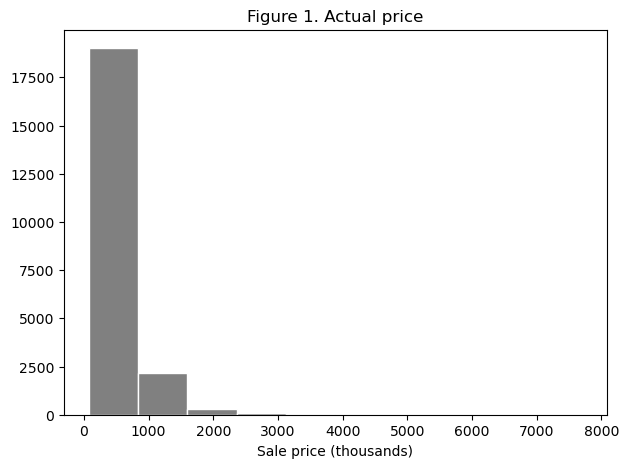

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
plt.title('Figure 1. Actual price')
plt.hist(df['price'], color='gray', edgecolor='white')
plt.xlabel('Sale price (thousands)');

### Q2. Linear regression equation

As for a classification model, we need a target vector and a features matrix to train a regression model. The target vector is the last column (`price`), and the features matrix contains the other columns minus `date` and `zipcode`.

In [7]:
y = df['price']
X = df.drop(columns=['date', 'zipcode', 'price'])

We use in this case the class `LinearRegression()` from the subpackage `linear_model`. 

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Note that we have left the parenthesis empty here. So, we accept the **default parameter values**, in particular the default loss function, which is the **mean squared error** (MSE). This is just the same least squares method which you can get in an Excel spreadsheet. 

The method `.fit()` calculates the optimal equation, that is, the parameter values for which the MSE is minimum. 

In [9]:
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The predicted prices for the houses included in the training data set are then calculated with the method `.predict()`. Note that, for regression, we don't have predicted probabilities, we get the predicted value in a direct way.

In [10]:
y_pred = lin_reg.predict(X)

Finally, we obtain a preliminary evaluation of the model with the method `.score()`.

In [11]:
round(lin_reg.score(X, y), 3)

0.646

For regression models, this score is the **R-squared** value, which, in ordinary least squares linear regression, is a **squared correlation**. More specifically, the square of the correlation between the actual prices (`y`) and the predicted prices (`y_pred`) is, here, the square root of 0.646, that is, 0.804.

### Q3. Plot the actual price versus the price predicted by your model

We use the `matplolibt.pyplot` function `scatter()`to create the **scatter plot**. The argument `s=2` controls the size of the dots. The choice of this size depends on the number of dots.

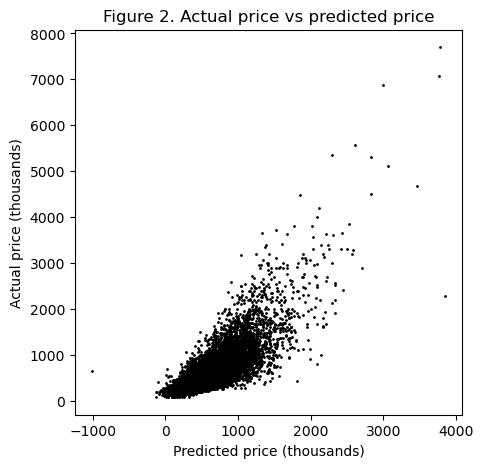

In [12]:
plt.figure(figsize=(5,5))
plt.title('Figure 2. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

This type of visualization helps to understand the data, and to detect undesired effects. In this case, we see that, in spite of the strong correlation, the prediction error can be big. This is not a contradiction, since the correlation only ensures an average predictive performance, and we have more than 20,000 data units.

Paying a bit more of attention, we can see that the biggest errors (in absolute value) happen in the most expensive houses. This is also a well known fact: the bigger what you measure, the bigger the measurement errors. Another issue is that some of the predicted prices are negative. We can count them:

In [13]:
(y_pred < 0).sum()

np.int64(38)

This may look pathological to you, but it is not rare in this type of data. Since the average error is null (this is a property of least 
squares), we have, more or less, the same amount of positive and negative errors. When a cheap house has a negative and substantial error, the predicted price can be negative. A different thing is the isolated point that we observe on the left of the two above figures. Something is wrong with that house.

### Q4. Dummies for the zipcodes

Since we are going to add the zipcode to the equation, we drop the longitude and the latitude, packing the remaining features in a matrix:

In [14]:
X1 = df.drop(columns=['date', 'zipcode', 'lat', 'long', 'price'])

As in the preceding lecture, we use the Pandas function `get_dummies()` to create the dummies. The resulting matrix is joined to `X1` with the Pandas function `concat()`, to get the new features matrix.

In [15]:
X2 = pd.get_dummies(df['zipcode'])
X = pd.concat([X1, X2], axis=1)

This adds 70 columns to `X1`, so we have now 80 features for prediction.

In [16]:
X.shape

(21613, 80)

To prevent the trouble with the column names, we convert `X` to a NumPy 2D array:

In [17]:
X = X.values

Now, we fit a regression equation to the new data set. This replaces the former model by a new one, which takes 80 features instead of 12. We could instantiate a new estimator with a different name, keeping both models alive, but in this example we just update the existing estimator with the new feature matrix.

In [18]:
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The new predictions are:

In [19]:
y_pred = lin_reg.predict(X)

And the new R-squared value:

In [20]:
round(lin_reg.score(X, y), 3)

0.785

This looks like a relevant improvement, compared to the former model. The scatter plot illustrates the improvement in the correlation:

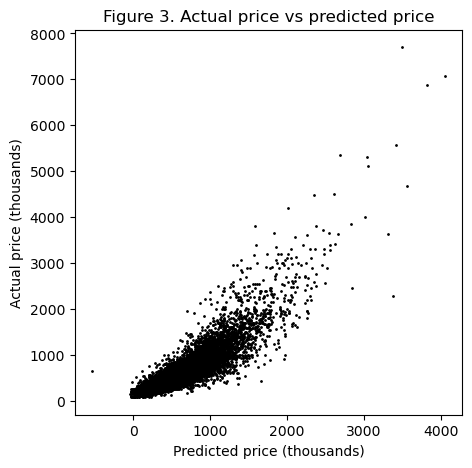

In [21]:
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

There are still negative predicted prices, though this has improved:

In [22]:
(y_pred < 0).sum()

np.int64(16)

### Q5. Tree-based models

A regression decision tree is created as a classification tree, but using the class `DecisionTreeRegressor` instead of `DecisionTreeClassifier`. We use here the specification `max_depth=6`, which makes sense for 80 features.

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=6)
tree_reg.fit(X, y)
round(tree_reg.score(X, y), 3)

0.658

An individual decision tree does not improve the results of the linear regression models. We train next a random forest regressor, which we extract from the class `RandomForestRegressor`, of the subpackage `ensemble`. We keep the specification `max_depth=6`, adding `n_estimators=100`, which specifies the number of trees in the forest.

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=6, n_estimators=100)
rf_reg.fit(X, y)
round(rf_reg.score(X, y), 3)

0.7

The random forest does a better job, as could be expected, but not as good as the enlarged linear regression model. We try next a gradient boosting approach. Assuming that `xgboost`is already installed, we can use the following code, which is pretty the same as in scikit-learn. We keep the size and the number of trees. The learning rate does not have much influence here.

In [25]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_reg.fit(X, y)
round(xgb_reg.score(X, y), 3)

0.885

Since this model is promising, we round the job with a scatter plot. Note the following two points:

* We don't get negative predicted prices here. Indeed, a tree-based method can never produce out-of-range predictions, since the predicted value in a tree leaf is just the average of the actual values in the that leaf.

* The errors for the top expensive houses are moderate. This is also comes from the way the predictions are obtained in decision tree models.

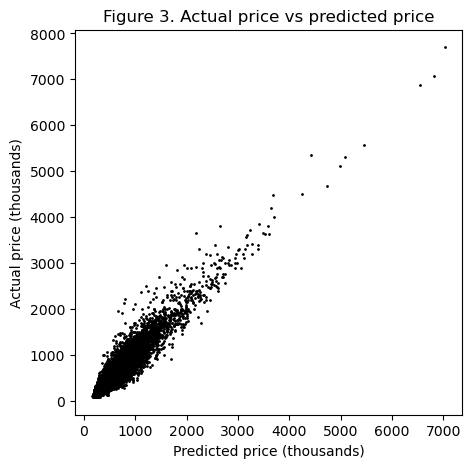

In [26]:
y_pred = xgb_reg.predict(X)
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

### Q6. Validation

Finally, we use a 80-20 train-test split to explore the potential overfitting by these models. The following code chunk separates a random choice of houses fror testing. Note that, since the function `train_test_split()` is applied to `X` and `y` in one shot, the random selection is the same for both.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We train now a linear regression model on the training set, and evaluate it on both subsets. We don't find evidence of overfitting here.

In [28]:
lin_reg.fit(X_train, y_train)
round(lin_reg.score(X_train, y_train), 3), round(lin_reg.score(X_test, y_test), 3)

(0.787, 0.777)

On the contrary, the XGBoost model shows clear overfitting symptoms.

In [29]:
xgb_reg.fit(X_train, y_train)
round(xgb_reg.score(X_train, y_train), 3), round(xgb_reg.score(X_test, y_test), 3)

(0.888, 0.802)

In spite of the overfitting issue, the performance of the XGBoost model on the test set is still a bit better that that of the linear regression model. Moreover, the two advantages that we have remarked in Q5, would mark it as the preferred one.

### Homework

1. The role of longitude and latitude in the prediction of real estate prices is unclear. Do they really contribute to get better predictions in the first model of this example? If we keep them in the second model, do we get a better model? 

2. Evaluate in dollar terms the predictive performance of the models presented in this example. For instance, you can use the mean (or median) absolute error. 

3. Is it better to use the percentage error in the above assessment?

4. Can the strong correlation obtained for the linear models of this example be an artifact created by the extreme values? Trim the data set, dropping the houses out a certain range of price and/or size. Do you get a better model?

5. How is the scatter plot for decision tree regressor? Can you explain the shape of the cloud of points obtained?

6. Try some variations on the number and the size of the trees in the ensemble models explored in this lecture. Can you improve their performance?